## 8.6 ランダムフォレストによる重要な回帰特徴量の選択

In [1]:
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Bostonデータセットを読み込む
data = skd.load_boston()

In [3]:
# データセットの詳細
print(data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
# ランダムフォレストモデル
reg = ske.RandomForestRegressor()

In [5]:
# データセットからサンプルと目的の値を取り出す
X = data['data']
y = data['target']

In [6]:
# 学習する
reg.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [7]:
# 特徴の重要度順にソート
# 特徴の重要度はfeature_importances_
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]

(0, 13)

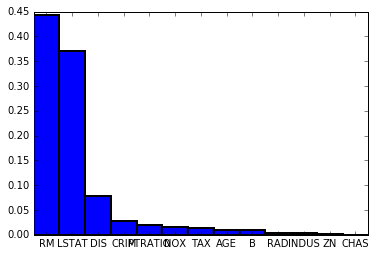

In [8]:
# ヒストグラムに表示
ax = plt.subplot(111)
plt.bar(np.arange(len(fet_imp)),fet_imp,width=1,lw=2)
plt.grid(False)
ax.set_xticks(np.arange(len(fet_imp))+.5)
ax.set_xticklabels(data['feature_names'][fet_ind])
plt.xlim(0,len(fet_imp))

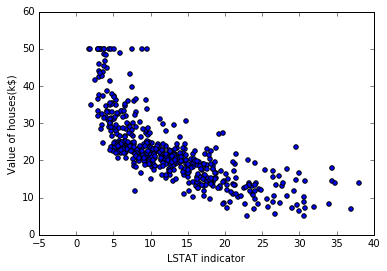

In [9]:
plt.scatter(X[:,-1],y)
plt.xlabel('LSTAT indicator')
plt.ylabel('Value of houses(k$)')

### メモ

* 決定木
* ブートストラップ標本：無造作に標本を抽出して置き換える
* バギング：bagging：個々の決定木の予測を平均
* ランダムサブスペース法：各ノードの特徴サブセットも無作為に選択

### 参考文献

* アンサンブル学習
* ランダムフォレストのAPIマニュアル
* ランダムフォレスト
* 決定木学習
* ブートストラップアグリゲーティング
* ランダムサブスペース法
* アンサンブル学習